<a href="https://colab.research.google.com/github/wooje-jung/class-project/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%20-%20Bitcoinprice%20Prediction/Bitcoin_Prediction_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI 프로그래밍 연습 - Final project

#0. 모듈 설치

In [1]:
!pip install pyupbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.2 MB/s eta 0:00:00


In [2]:
# talib(Technical Analysis Library)을 사용하기위해 설치
# https://xikest.tistory.com/16
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-12-10 23:13:34--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-10 23:13:34--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-10 23:13:35--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [3]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

#1. 비트코인 가격정보 수집
<모델에 학습시킬 데이터>

1.   수집대상 : 업비트 -> 비트코인 가격정보 o
2.   수집날짜 : 2021-11-01 ~ 2022.12.31

 --> 가격정보기반으로 보조지표 생성 o
 --> 환경 예측요소 (환율, 환율 이동평균, 전 산업 생산지수)



In [4]:
import pyupbit
import pandas as pd

In [5]:
pyupbit.get_tickers(fiat='KRW-BTC')

['KRW-BTC']

In [6]:
# 비트코인
ticker = 'KRW-BTC'
interval = 'day'
to = '2023-01-01 00:00 '
count = 426
data_price = pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to,count=count)
data_price = pd.DataFrame(data_price)

In [7]:
data_price

,open,high,low,close,volume,value
2021-11-01 09:00:00,72325000.0,73928000.0,71003000.0,72401000.0,6319.810246,4.597998e+11
2021-11-02 09:00:00,72402000.0,75590000.0,72031000.0,74150000.0,7684.606050,5.671384e+11
2021-11-03 09:00:00,74106000.0,75141000.0,72500000.0,74600000.0,7931.123110,5.861474e+11
2021-11-04 09:00:00,74607000.0,74880000.0,73480000.0,73807000.0,5757.701988,4.264695e+11
2021-11-05 09:00:00,73807000.0,75000000.0,73490000.0,74121000.0,5520.423654,4.107097e+11
...,...,...,...,...,...,...
2022-12-27 09:00:00,21711000.0,21745000.0,21242000.0,21321000.0,2842.524510,6.110500e+10
2022-12-28 09:00:00,21324000.0,21396000.0,21010000.0,21061000.0,3151.280761,6.675252e+10
2022-12-29 09:00:00,21061000.0,21295000.0,20908000.0,21201000.0,2464.457822,5.197588e+10
2022-12-30 09:00:00,21201000.0,21232000.0,20700000.0,21070000.0,2699.072216,5.657707e+10


In [8]:
data_price.to_csv('bitcoinprice.csv')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

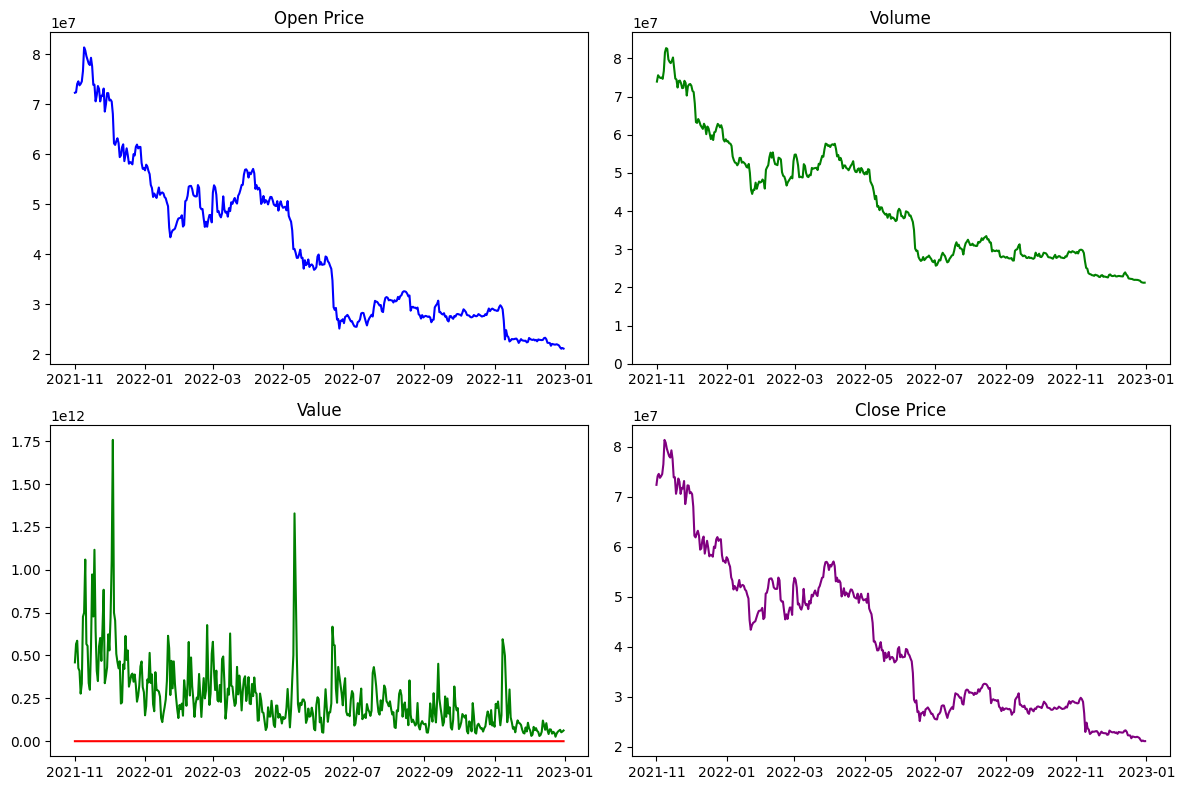

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# 1 가격 지표 만들기
# 주어진 데이터셋
df1 = pd.read_csv('bitcoinprice.csv')

df = pd.DataFrame(df1)

# 날짜 인덱스 추가
df.index = pd.date_range('2021-11-01', periods=len(df), freq='D')

# 각 유형에 대한 그래프 그리기
plt.figure(figsize=(12, 8))

# Open 가격 그래프
plt.subplot(2, 2, 1)
plt.plot(df['open'], label='Open', color='blue')
plt.title('Open Price')

# High 가격 그래프
plt.subplot(2, 2, 2)
plt.plot(df['high'], label='High', color='green')
plt.title('High Price')

# Low 가격 그래프
plt.subplot(2, 2, 3)
plt.plot(df['low'], label='Low', color='red')
plt.title('Low Price')

# Close 가격 그래프
plt.subplot(2, 2, 4)
plt.plot(df['close'], label='Close', color='purple')
plt.title('Close Price')

# 거래량 그래프
plt.subplot(2, 2, 2)
plt.bar(df.index, df['volume'], color='blue', alpha=0.7)
plt.title('Volume')

# 시가총액 그래프
plt.subplot(2, 2, 3)
plt.plot(df['value'], label='Value', color='green')
plt.title('Value')

plt.tight_layout()
plt.show()

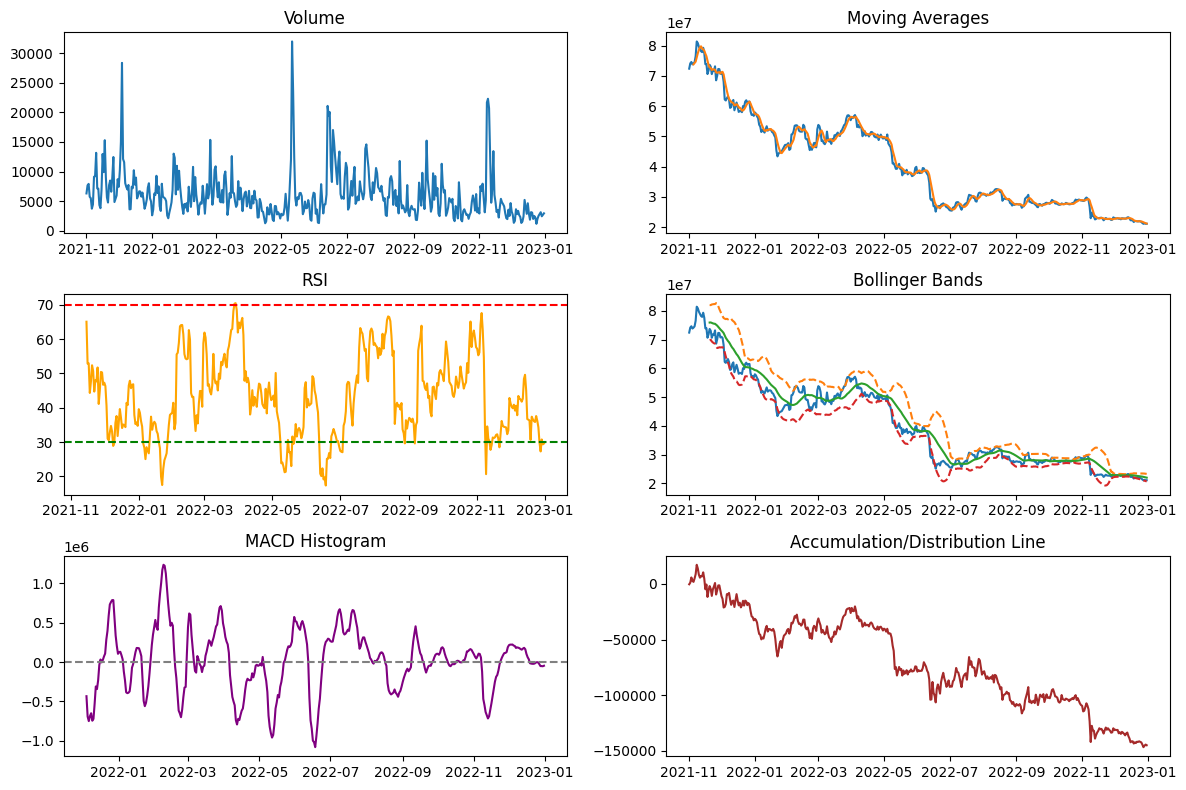

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import talib

#2 보조 지표 만들기
# 데이터 불러오기
df1 = pd.read_csv('bitcoinprice.csv')
df = pd.DataFrame(df1)

# 날짜 인덱스 추가
df.index = pd.date_range('2021-11-01', periods=len(df), freq='D')

# 보조지표 계산
# 이동평균 계산
df['MA_5'] = df['close'].rolling(window=5).mean()

# RSI 계산
rsi_period = 14
df['rsi'] = talib.RSI(df['close'], timeperiod=rsi_period)

# 볼린저 밴드 계산
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# MACD 계산
df['macd'], df['signal'], _ = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 보조지표 그래프 찍기
# 거래량 그래프
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.plot(df['volume'], label='Volume')
plt.title('Volume')

# 이동평균 그래프
plt.subplot(3, 2, 2)
plt.plot(df['close'], label='Closing Price')
plt.plot(df['MA_5'], label='5-day Moving Average')
plt.title('Moving Averages')

# RSI(상대강도지수) 그래프
plt.subplot(3, 2, 3)
plt.plot(df['rsi'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI')

# 볼린저 밴드 그래프
plt.subplot(3, 2, 4)
plt.plot(df['close'], label='Closing Price')
plt.plot(df['upper_band'], label='Upper Band', linestyle='--')
plt.plot(df['middle_band'], label='Middle Band')
plt.plot(df['lower_band'], label='Lower Band', linestyle='--')
plt.title('Bollinger Bands')

# MACD 그래프
plt.subplot(3, 2, 5)
plt.plot(df['macd'] - df['signal'], label='MACD Histogram', color='purple')
plt.axhline(0, color='gray', linestyle='--', label='Zero Line')
plt.title('MACD Histogram')

# 누적/분배선 그래프
plt.subplot(3, 2, 6)
df['adl'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])
plt.plot(df['adl'], label='Accumulation/Distribution Line', color='brown')
plt.title('Accumulation/Distribution Line')

plt.tight_layout()
plt.show()

#2. 비트코인 가격정보로 csv로만들기
<모델에 학습시킬 데이터>
1. 가격 지표
2. 보조 지표



In [12]:
#1. 가격 지표
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 데이터셋
df2 = pd.read_csv('bitcoinprice.csv')
df = pd.DataFrame(df2)

# 날짜 인덱스 추가
df.index = pd.date_range('2021-11-01', periods=len(df), freq='D')

# 2022년의 가격 데이터
price_df_2022 = df['2022-01-01':'2022-12-31']
price_df_2022

# Open 가격 데이터를 CSV 파일로 저장
open_price_data = price_df_2022[['open']].copy()
open_price_data.to_csv('open_price_data.csv')

# High 가격 데이터를 CSV 파일로 저장
high_price_data = price_df_2022[['high']].copy()
high_price_data.to_csv('high_price_data.csv')

# Low 가격 데이터를 CSV 파일로 저장
low_price_data = price_df_2022[['low']].copy()
low_price_data.to_csv('low_price_data.csv')

# Close 가격 데이터를 CSV 파일로 저장
close_price_data = price_df_2022[['close']].copy()
close_price_data.to_csv('close_price_data.csv')

# 거래량 데이터를 CSV 파일로 저장
volume_data = price_df_2022[['volume']].copy()
volume_data.to_csv('volume1_data.csv')

# 시가총액 데이터를 CSV 파일로 저장
value_data = price_df_2022[['value']].copy()
value_data.to_csv('value_data.csv')



In [13]:
#2. 보조 지표
import pandas as pd
import matplotlib.pyplot as plt
import talib

# 데이터 불러오기
df3 = pd.read_csv('bitcoinprice.csv')
df = pd.DataFrame(df3)

# 날짜 인덱스 추가
df.index = pd.date_range('2021-11-01', periods=len(df), freq='D')

# 보조지표 계산
# 이동평균 계산
df['MA_5'] = df['close'].rolling(window=5).mean()
df['Ma_20'] = df['close'].rolling(window=20).mean()

# RSI 계산
# 상대강도지수
rsi_period = 14
df['rsi'] = talib.RSI(df['close'], timeperiod=rsi_period)

# 볼린저 밴드 계산
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# MACD 계산
df['macd'], df['signal'], _ = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 누적/분배선 계산
df['adl'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])

indicator_df_2022 = df['2022-01-01':'2022-12-31']
indicator_df_2022

indicator_df_2022[['close', 'MA_5']].to_csv('moving_average_data.csv')
indicator_df_2022[['rsi']].to_csv('rsi_data.csv')
indicator_df_2022[['close', 'upper_band', 'middle_band', 'lower_band']].to_csv('bollinger_bands_data.csv')
indicator_df_2022[['macd', 'signal']].to_csv('macd_data.csv')
indicator_df_2022[['adl']].to_csv('accumulation_distribution_data.csv')
indicator_df_2022



,Unnamed: 0,open,high,low,close,volume,value,MA_5,Ma_20,rsi,upper_band,middle_band,lower_band,macd,signal,adl
2022-01-01,2022-01-01 09:00:00,56784000.0,58271000.0,56762000.0,57915000.0,2628.145965,1.510645e+11,57452400.0,59350900.0,39.586957,6.262919e+07,59350900.0,5.607261e+07,-1.961993e+06,-2.090096e+06,-31275.274766
2022-01-02,2022-01-02 09:00:00,57915000.0,58300000.0,57100000.0,57531000.0,3567.505712,2.052913e+11,57303800.0,59296150.0,38.536377,6.265658e+07,59296150.0,5.593572e+07,-1.927093e+06,-2.057495e+06,-32280.122209
2022-01-03,2022-01-03 09:00:00,57540000.0,57749000.0,56133000.0,56641000.0,6304.958564,3.600635e+11,57214200.0,59131700.0,36.142311,6.266921e+07,59131700.0,5.559419e+07,-1.948786e+06,-2.035754e+06,-34621.072170
2022-01-04,2022-01-04 09:00:00,56640000.0,57685000.0,56000000.0,56023000.0,6053.445802,3.425126e+11,56978800.0,58872950.0,34.537799,6.252330e+07,58872950.0,5.522260e+07,-1.992872e+06,-2.027177e+06,-40509.260699
2022-01-05,2022-01-05 09:00:00,56023000.0,57100000.0,52701000.0,53854000.0,9296.798714,5.152768e+11,56392800.0,58574800.0,29.575186,6.279726e+07,58574800.0,5.435234e+07,-2.177728e+06,-2.057287e+06,-44932.584115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022-12-27 09:00:00,21711000.0,21745000.0,21242000.0,21321000.0,2842.524510,6.110500e+10,21738800.0,22320850.0,29.863629,2.342729e+07,22320850.0,2.121441e+07,-4.422065e+05,-4.162910e+05,-144321.518695
2022-12-28,2022-12-28 09:00:00,21324000.0,21396000.0,21010000.0,21061000.0,3151.280761,6.675252e+10,21576600.0,22228000.0,27.272608,2.342627e+07,22228000.0,2.102973e+07,-4.801171e+05,-4.290562e+05,-146640.077597
2022-12-29,2022-12-29 09:00:00,21061000.0,21295000.0,20908000.0,21201000.0,2464.457822,5.197588e+10,21426600.0,22145600.0,30.756362,2.338757e+07,22145600.0,2.090363e+07,-4.931796e+05,-4.418809e+05,-145372.824092
2022-12-30,2022-12-30 09:00:00,21201000.0,21232000.0,20700000.0,21070000.0,2699.072216,5.657707e+10,21271000.0,22057550.0,29.340115,2.334165e+07,22057550.0,2.077345e+07,-5.082436e+05,-4.551534e+05,-144317.547737


#3. 수집한 데이터로 모델에 학습시키기
**LSTM**
1. 가격 지표
2. 가격 + 보조

**Bidirectional LSTM**
1. 가격 지표
2. 가격 + 보조





In [14]:
!pip install tensorflow

In [15]:
!pip install keras

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, Bidirectional
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np

In [17]:
# 1.price data로 학습된 LSTM으로 종가 예측하기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# CSV 파일로 저장된 데이터 불러오기
open_price_data = pd.read_csv('open_price_data.csv', index_col=0)
high_price_data = pd.read_csv('high_price_data.csv', index_col=0)
low_price_data = pd.read_csv('low_price_data.csv', index_col=0)
close_price_data = pd.read_csv('close_price_data.csv', index_col=0)
volume_data = pd.read_csv('volume1_data.csv', index_col=0)
value_data = pd.read_csv('value_data.csv', index_col=0)

# 각각의 데이터 스케일링
scaler = MinMaxScaler()

open_price_scaled = scaler.fit_transform(open_price_data)
high_price_scaled = scaler.fit_transform(high_price_data)
low_price_scaled = scaler.fit_transform(low_price_data)
close_price_scaled = scaler.fit_transform(close_price_data)
volume_scaled = scaler.fit_transform(volume_data)
value_scaled = scaler.fit_transform(value_data)

# 스케일링된 데이터를 하나의 데이터프레임으로 합치기
scaled_data = pd.DataFrame({
    'Open': open_price_scaled.flatten(),
    'High': high_price_scaled.flatten(),
    'Low': low_price_scaled.flatten(),
    'Close': close_price_scaled.flatten(),
    'Volume': volume_scaled.flatten(),
    'Value': value_scaled.flatten()
})
scaled_data



,Open,High,Low,Close,Volume,Value
0,0.969311,0.999218,0.990714,1.000000,0.046671,0.095892
1,1.000000,1.000000,1.000000,0.989581,0.077194,0.137521
2,0.989825,0.985135,0.973434,0.965431,0.166143,0.256338
3,0.965404,0.983409,0.969780,0.948662,0.157971,0.242865
4,0.948662,0.967627,0.879148,0.889808,0.263358,0.375494
...,...,...,...,...,...,...
360,0.017637,0.013839,0.014890,0.007055,0.053637,0.026831
361,0.007136,0.004424,0.008516,0.000000,0.063670,0.031167
362,0.000000,0.001700,0.005714,0.003799,0.041352,0.019823
363,0.003799,0.000000,0.000000,0.000244,0.048976,0.023355


In [18]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data.drop('Close', 1), scaled_data['Close'], test_size=0.1, random_state=0, shuffle=False)
x_train.shape, y_train.shape

<ipython-input-18-80259fae8a9f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(scaled_data.drop('Close', 1), scaled_data['Close'], test_size=0.1, random_state=0, shuffle=False)


((328, 5), (328,))

In [19]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [20]:
WINDOW_SIZE=5
BATCH_SIZE=32

In [21]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [22]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 5]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [23]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=1000,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
     10/Unknown - 3s 6ms/step - loss: 0.1425 - mse: 0.2849
Epoch 1: val_loss improved from inf to 0.00023, saving model to tmp/ckeckpointer.ckpt
11/11 [==============================] - 4s 111ms/step - loss: 0.1431 - mse: 0.2862 - val_loss: 2.2625e-04 - val_mse: 4.5251e-04
Epoch 2/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.1081 - mse: 0.2161
Epoch 2: val_loss did not improve from 0.00023
11/11 [==============================] - 0s 20ms/step - loss: 0.1047 - mse: 0.2093 - val_loss: 4.8964e-04 - val_mse: 9.7927e-04
Epoch 3/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0707 - mse: 0.1414
Epoch 3: val_loss did not improve from 0.00023
11/11 [==============================] - 0s 18ms/step - loss: 0.0706 - mse: 0.1411 - val_loss: 0.0023 - val_mse: 0.0045
Epoch 4/1000
11/11 [==============================] - ETA: 0s - loss: 0.0417 - mse: 0.0834
Epoch 4: val_loss did not improve from 0.00023
11/11 [==============================] - 0s 17ms/st

In [24]:
print("%.7f" % (float(min(history.history['val_loss']))))
model.load_weights(filename)
pred = model.predict(test_data)
actual = np.asarray(y_test)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))
print(pred.shape)
print(actual.shape)

0.0002263
1/1 [==============================] - 1s 816ms/step
(32, 1)
(32, 1)


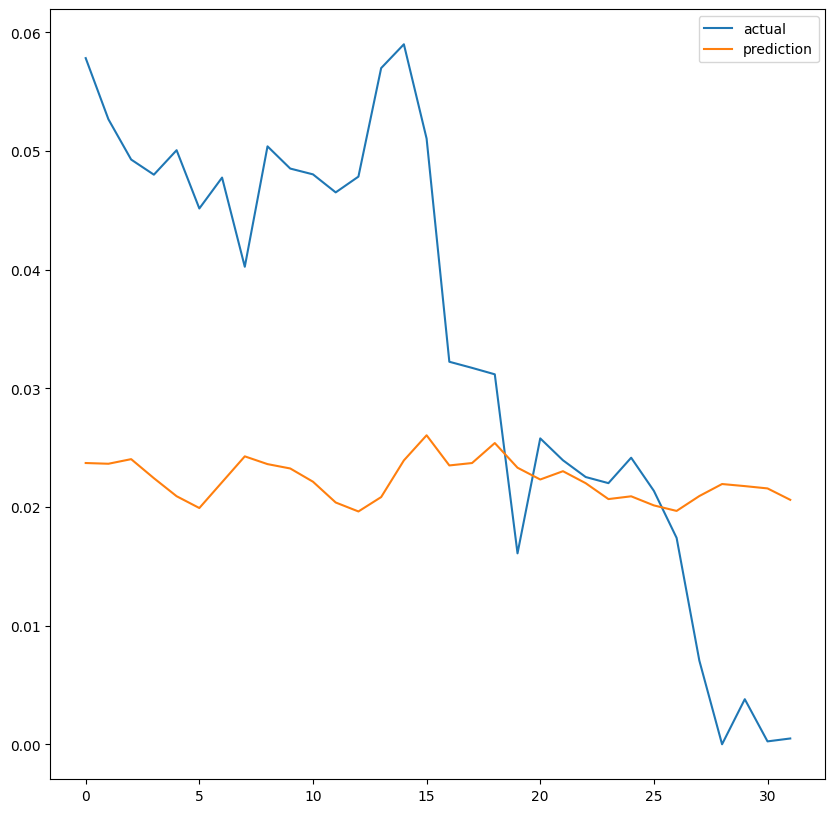

In [25]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [42]:
indicator_df_2022

,high,low,close,volume,value,MA_5,Ma_20,rsi,upper_band,middle_band,lower_band,macd,signal,adl
2022-01-01,58271000.0,56762000.0,57915000.0,2628.145965,1.510645e+11,57452400.0,59350900.0,39.586957,6.262919e+07,59350900.0,5.607261e+07,-1.961993e+06,-2.090096e+06,-31275.274766
2022-01-02,58300000.0,57100000.0,57531000.0,3567.505712,2.052913e+11,57303800.0,59296150.0,38.536377,6.265658e+07,59296150.0,5.593572e+07,-1.927093e+06,-2.057495e+06,-32280.122209
2022-01-03,57749000.0,56133000.0,56641000.0,6304.958564,3.600635e+11,57214200.0,59131700.0,36.142311,6.266921e+07,59131700.0,5.559419e+07,-1.948786e+06,-2.035754e+06,-34621.072170
2022-01-04,57685000.0,56000000.0,56023000.0,6053.445802,3.425126e+11,56978800.0,58872950.0,34.537799,6.252330e+07,58872950.0,5.522260e+07,-1.992872e+06,-2.027177e+06,-40509.260699
2022-01-05,57100000.0,52701000.0,53854000.0,9296.798714,5.152768e+11,56392800.0,58574800.0,29.575186,6.279726e+07,58574800.0,5.435234e+07,-2.177728e+06,-2.057287e+06,-44932.584115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,21745000.0,21242000.0,21321000.0,2842.524510,6.110500e+10,21738800.0,22320850.0,29.863629,2.342729e+07,22320850.0,2.121441e+07,-4.422065e+05,-4.162910e+05,-144321.518695
2022-12-28,21396000.0,21010000.0,21061000.0,3151.280761,6.675252e+10,21576600.0,22228000.0,27.272608,2.342627e+07,22228000.0,2.102973e+07,-4.801171e+05,-4.290562e+05,-146640.077597
2022-12-29,21295000.0,20908000.0,21201000.0,2464.457822,5.197588e+10,21426600.0,22145600.0,30.756362,2.338757e+07,22145600.0,2.090363e+07,-4.931796e+05,-4.418809e+05,-145372.824092
2022-12-30,21232000.0,20700000.0,21070000.0,2699.072216,5.657707e+10,21271000.0,22057550.0,29.340115,2.334165e+07,22057550.0,2.077345e+07,-5.082436e+05,-4.551534e+05,-144317.547737


In [29]:
# 2.price data와 indicate data로 학습된 LSTM으로 종가 예측하기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
indicator_df_2022 = indicator_df_2022.drop(indicator_df_2022.columns[0],axis=1)
rescale_indicator = scaler.fit_transform(indicator_df_2022)
df_rescale_indicator = pd.DataFrame(rescale_indicator)
df_rescale_indicator


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.999218,0.990714,1.000000,0.046671,0.095892,1.000000,1.000000,0.418573,0.964108,1.000000,1.000000,0.306921,0.230579,0.911983
1,1.000000,1.000000,0.989581,0.077194,0.137521,0.995907,0.998535,0.398796,0.964777,0.998535,0.996283,0.313286,0.237300,0.904039
2,0.985135,0.973434,0.965431,0.166143,0.256338,0.993439,0.994136,0.353730,0.965085,0.994136,0.987009,0.309330,0.241782,0.885534
3,0.983409,0.969780,0.948662,0.157971,0.242865,0.986955,0.987213,0.323526,0.961521,0.987213,0.976918,0.301289,0.243550,0.838986
4,0.967627,0.879148,0.889808,0.263358,0.375494,0.970815,0.979237,0.230108,0.968213,0.979237,0.953286,0.267572,0.237343,0.804019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.013839,0.014890,0.007055,0.053637,0.026831,0.016317,0.009313,0.235537,0.006504,0.009313,0.053425,0.584119,0.575659,0.018329
361,0.004424,0.008516,0.000000,0.063670,0.031167,0.011849,0.006829,0.186763,0.006479,0.006829,0.048410,0.577204,0.573027,0.000000
362,0.001700,0.005714,0.003799,0.041352,0.019823,0.007718,0.004624,0.252343,0.005534,0.004624,0.044985,0.574822,0.570383,0.010018
363,0.000000,0.000000,0.000244,0.048976,0.023355,0.003432,0.002269,0.225683,0.004412,0.002269,0.041450,0.572074,0.567647,0.018360


In [30]:
x_train, x_test, y_train, y_test = train_test_split(df_rescale_indicator.drop(4, 1), df_rescale_indicator[4], test_size=0.1, random_state=0, shuffle=False)
x_train.shape, y_train.shape
print(type(x_test))
print(x_test)

<class 'pandas.core.frame.DataFrame'>
           0         1         2         3         5         6         7   \
328  0.042139  0.045879  0.043822  0.058758  0.041156  0.048999  0.321882   
329  0.043973  0.052335  0.043387  0.031095  0.043580  0.039886  0.320095   
330  0.041599  0.052335  0.043008  0.025905  0.043921  0.031460  0.318419   
331  0.039333  0.041676  0.034677  0.077571  0.040362  0.025693  0.281233   
332  0.037364  0.039973  0.036794  0.043284  0.038594  0.025021  0.301026   
333  0.055601  0.047115  0.057823  0.113686  0.041437  0.022898  0.479816   
334  0.058487  0.059643  0.052667  0.067804  0.043321  0.022024  0.450578   
335  0.048937  0.053571  0.049276  0.049251  0.044593  0.021351  0.431114   
336  0.046968  0.056374  0.048000  0.005521  0.047298  0.021779  0.423507   
337  0.048263  0.056456  0.050062  0.016190  0.049992  0.022053  0.442961   
338  0.051743  0.054533  0.045151  0.079872  0.047419  0.021681  0.410479   
339  0.044594  0.054973  0.047756  0.0

<ipython-input-30-fc312640c952>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df_rescale_indicator.drop(4, 1), df_rescale_indicator[4], test_size=0.1, random_state=0, shuffle=False)


In [31]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [39]:
WINDOW_SIZE=13
BATCH_SIZE=32

In [33]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [40]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=14,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 13]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [41]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=1000,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
      7/Unknown - 3s 9ms/step - loss: 0.0049 - mse: 0.0099
Epoch 1: val_loss improved from inf to 0.00070, saving model to tmp/ckeckpointer.ckpt
10/10 [==============================] - 4s 81ms/step - loss: 0.0058 - mse: 0.0116 - val_loss: 7.0172e-04 - val_mse: 0.0014
Epoch 2/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.0060 - mse: 0.0120
Epoch 2: val_loss improved from 0.00070 to 0.00034, saving model to tmp/ckeckpointer.ckpt
10/10 [==============================] - 0s 18ms/step - loss: 0.0054 - mse: 0.0108 - val_loss: 3.3852e-04 - val_mse: 6.7703e-04
Epoch 3/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.0062 - mse: 0.0124
Epoch 3: val_loss improved from 0.00034 to 0.00028, saving model to tmp/ckeckpointer.ckpt
10/10 [==============================] - 0s 16ms/step - loss: 0.0054 - mse: 0.0107 - val_loss: 2.8475e-04 - val_mse: 5.6949e-04
Epoch 4/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.0043 - mse: 0.0086
Epoch 4: 

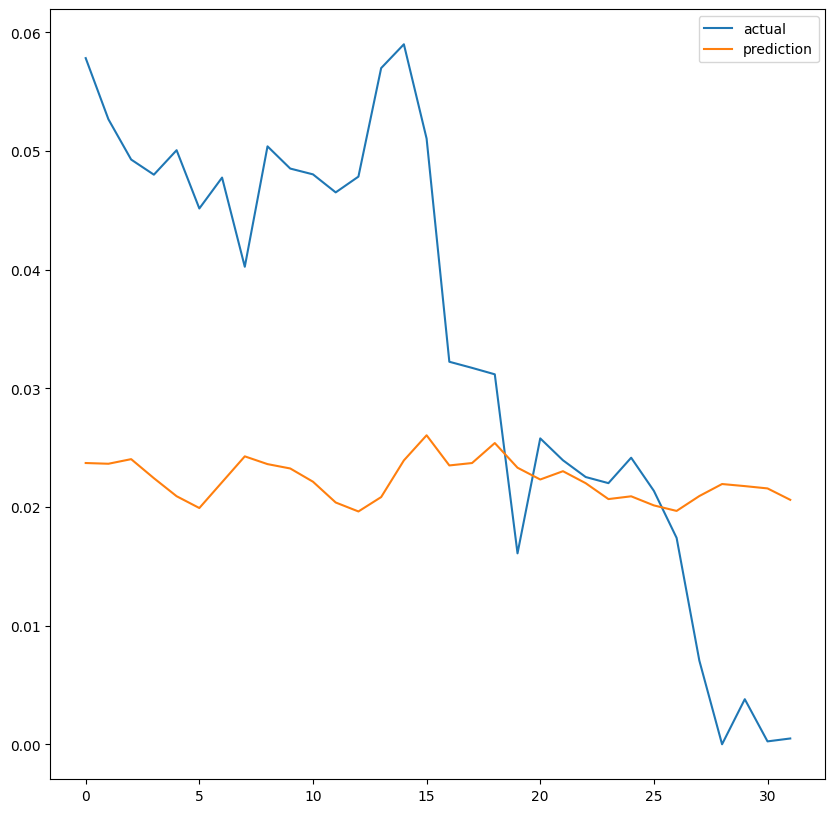

In [43]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [44]:
# 3.price data로 학습된 Bidirectional LSTM으로 종가 예측하기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# CSV 파일로 저장된 데이터 불러오기
open_price_data = pd.read_csv('open_price_data.csv', index_col=0)
high_price_data = pd.read_csv('high_price_data.csv', index_col=0)
low_price_data = pd.read_csv('low_price_data.csv', index_col=0)
close_price_data = pd.read_csv('close_price_data.csv', index_col=0)
volume_data = pd.read_csv('volume1_data.csv', index_col=0)
value_data = pd.read_csv('value_data.csv', index_col=0)

# 각각의 데이터 스케일링
scaler = MinMaxScaler()

open_price_scaled = scaler.fit_transform(open_price_data)
high_price_scaled = scaler.fit_transform(high_price_data)
low_price_scaled = scaler.fit_transform(low_price_data)
close_price_scaled = scaler.fit_transform(close_price_data)
volume_scaled = scaler.fit_transform(volume_data)
value_scaled = scaler.fit_transform(value_data)

# 스케일링된 데이터를 하나의 데이터프레임으로 합치기
scaled_data = pd.DataFrame({
    'Open': open_price_scaled.flatten(),
    'High': high_price_scaled.flatten(),
    'Low': low_price_scaled.flatten(),
    'Close': close_price_scaled.flatten(),
    'Volume': volume_scaled.flatten(),
    'Value': value_scaled.flatten()
})
scaled_data

,Open,High,Low,Close,Volume,Value
0,0.969311,0.999218,0.990714,1.000000,0.046671,0.095892
1,1.000000,1.000000,1.000000,0.989581,0.077194,0.137521
2,0.989825,0.985135,0.973434,0.965431,0.166143,0.256338
3,0.965404,0.983409,0.969780,0.948662,0.157971,0.242865
4,0.948662,0.967627,0.879148,0.889808,0.263358,0.375494
...,...,...,...,...,...,...
360,0.017637,0.013839,0.014890,0.007055,0.053637,0.026831
361,0.007136,0.004424,0.008516,0.000000,0.063670,0.031167
362,0.000000,0.001700,0.005714,0.003799,0.041352,0.019823
363,0.003799,0.000000,0.000000,0.000244,0.048976,0.023355


In [45]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data.drop('Close', 1), scaled_data['Close'], test_size=0.1, random_state=0, shuffle=False)
x_train.shape, y_train.shape
print(type(x_test))
print(x_test)


<class 'pandas.core.frame.DataFrame'>
         Open      High       Low    Volume     Value
328  0.045422  0.042139  0.045879  0.058758  0.031976
329  0.043849  0.043973  0.052335  0.031095  0.017435
330  0.043008  0.041599  0.052335  0.025905  0.014602
331  0.043415  0.039333  0.041676  0.077571  0.041501
332  0.034406  0.037364  0.039973  0.043284  0.023409
333  0.036794  0.055601  0.047115  0.113686  0.062504
334  0.058284  0.058487  0.059643  0.067804  0.038083
335  0.052830  0.048937  0.053571  0.049251  0.027331
336  0.049276  0.046968  0.056374  0.005521  0.003775
337  0.047756  0.048263  0.056456  0.016190  0.009602
338  0.050388  0.051743  0.054533  0.079872  0.044236
339  0.045260  0.044594  0.054973  0.053132  0.029396
340  0.048190  0.044944  0.046703  0.071139  0.038551
341  0.040240  0.047696  0.049011  0.047651  0.026166
342  0.050388  0.047696  0.056868  0.037624  0.021158
343  0.048407  0.046077  0.058242  0.004807  0.003449
344  0.047837  0.045403  0.056593  0.012998 

<ipython-input-45-e5540b8ae649>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(scaled_data.drop('Close', 1), scaled_data['Close'], test_size=0.1, random_state=0, shuffle=False)


In [46]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)


In [47]:
WINDOW_SIZE=5
BATCH_SIZE=32

In [48]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Bidirectional
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam



model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 5]),
    # Bidirectional LSTM
    Bidirectional(LSTM(16, activation='tanh')),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

In [50]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=1000,
                    callbacks=[checkpoint, earlystopping])


Epoch 1/1000
      8/Unknown - 6s 8ms/step - loss: 0.0827 - mse: 0.1655
Epoch 1: val_loss improved from inf to 0.00074, saving model to tmp/ckeckpointer.ckpt
11/11 [==============================] - 7s 118ms/step - loss: 0.0758 - mse: 0.1516 - val_loss: 7.3505e-04 - val_mse: 0.0015
Epoch 2/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0197 - mse: 0.0395
Epoch 2: val_loss did not improve from 0.00074
11/11 [==============================] - 0s 12ms/step - loss: 0.0154 - mse: 0.0308 - val_loss: 0.0056 - val_mse: 0.0112
Epoch 3/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0058 - mse: 0.0116
Epoch 3: val_loss did not improve from 0.00074
11/11 [==============================] - 0s 10ms/step - loss: 0.0060 - mse: 0.0120 - val_loss: 0.0056 - val_mse: 0.0112
Epoch 4/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0039 - mse: 0.0079
Epoch 4: val_loss did not improve from 0.00074
11/11 [==============================] - 0s 9ms/step - loss: 0.

In [51]:
print("%.7f" % (float(min(history.history['val_loss']))))
model.load_weights(filename)
pred = model.predict(test_data)
actual = np.asarray(y_test)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))
print(pred.shape)
print(actual.shape)


0.0000491
1/1 [==============================] - 1s 1s/step
(32, 1)
(32, 1)


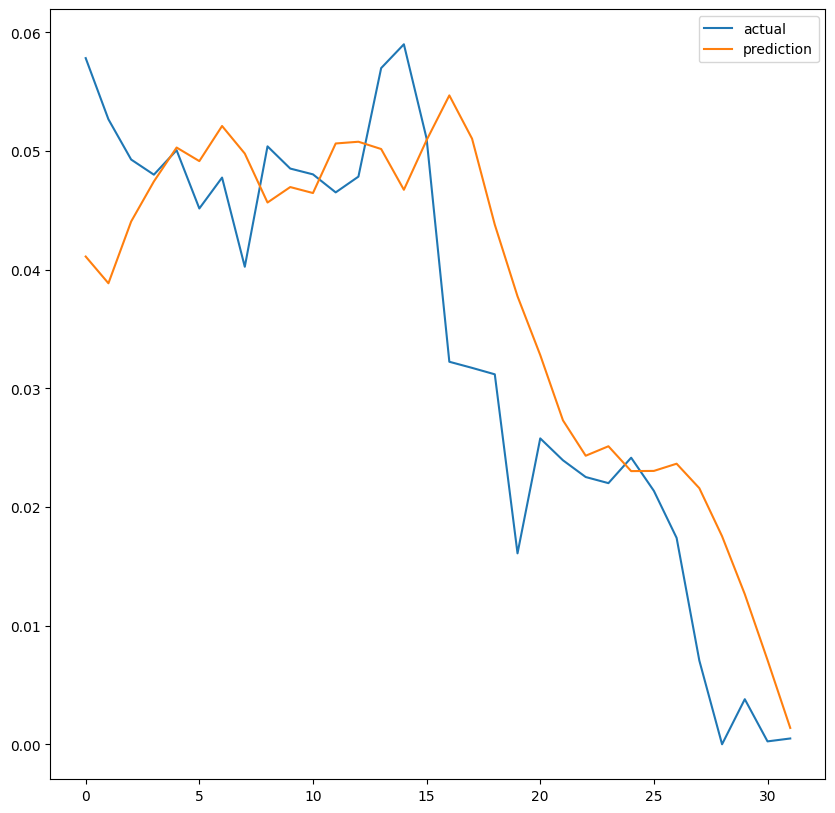

In [52]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [53]:
# 4.price data와 indicate data로 학습된 Bidirectional LSTM으로 종가 예측하기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
indicator_df_2022
rescale_indicator = scaler.fit_transform(indicator_df_2022)
df_rescale_indicator = pd.DataFrame(rescale_indicator)
df_rescale_indicator


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.999218,0.990714,1.000000,0.046671,0.095892,1.000000,1.000000,0.418573,0.964108,1.000000,1.000000,0.306921,0.230579,0.911983
1,1.000000,1.000000,0.989581,0.077194,0.137521,0.995907,0.998535,0.398796,0.964777,0.998535,0.996283,0.313286,0.237300,0.904039
2,0.985135,0.973434,0.965431,0.166143,0.256338,0.993439,0.994136,0.353730,0.965085,0.994136,0.987009,0.309330,0.241782,0.885534
3,0.983409,0.969780,0.948662,0.157971,0.242865,0.986955,0.987213,0.323526,0.961521,0.987213,0.976918,0.301289,0.243550,0.838986
4,0.967627,0.879148,0.889808,0.263358,0.375494,0.970815,0.979237,0.230108,0.968213,0.979237,0.953286,0.267572,0.237343,0.804019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.013839,0.014890,0.007055,0.053637,0.026831,0.016317,0.009313,0.235537,0.006504,0.009313,0.053425,0.584119,0.575659,0.018329
361,0.004424,0.008516,0.000000,0.063670,0.031167,0.011849,0.006829,0.186763,0.006479,0.006829,0.048410,0.577204,0.573027,0.000000
362,0.001700,0.005714,0.003799,0.041352,0.019823,0.007718,0.004624,0.252343,0.005534,0.004624,0.044985,0.574822,0.570383,0.010018
363,0.000000,0.000000,0.000244,0.048976,0.023355,0.003432,0.002269,0.225683,0.004412,0.002269,0.041450,0.572074,0.567647,0.018360


In [54]:
x_train, x_test, y_train, y_test = train_test_split(df_rescale_indicator.drop(4, 1), df_rescale_indicator[4], test_size=0.1, random_state=0, shuffle=False)
x_train.shape, y_train.shape
print(type(x_test))
print(x_test)

<class 'pandas.core.frame.DataFrame'>
           0         1         2         3         5         6         7   \
328  0.042139  0.045879  0.043822  0.058758  0.041156  0.048999  0.321882   
329  0.043973  0.052335  0.043387  0.031095  0.043580  0.039886  0.320095   
330  0.041599  0.052335  0.043008  0.025905  0.043921  0.031460  0.318419   
331  0.039333  0.041676  0.034677  0.077571  0.040362  0.025693  0.281233   
332  0.037364  0.039973  0.036794  0.043284  0.038594  0.025021  0.301026   
333  0.055601  0.047115  0.057823  0.113686  0.041437  0.022898  0.479816   
334  0.058487  0.059643  0.052667  0.067804  0.043321  0.022024  0.450578   
335  0.048937  0.053571  0.049276  0.049251  0.044593  0.021351  0.431114   
336  0.046968  0.056374  0.048000  0.005521  0.047298  0.021779  0.423507   
337  0.048263  0.056456  0.050062  0.016190  0.049992  0.022053  0.442961   
338  0.051743  0.054533  0.045151  0.079872  0.047419  0.021681  0.410479   
339  0.044594  0.054973  0.047756  0.0

<ipython-input-54-fc312640c952>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df_rescale_indicator.drop(4, 1), df_rescale_indicator[4], test_size=0.1, random_state=0, shuffle=False)


In [55]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [56]:
WINDOW_SIZE=14
BATCH_SIZE=32

In [57]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [59]:
indicator_df_2022

,high,low,close,volume,value,MA_5,Ma_20,rsi,upper_band,middle_band,lower_band,macd,signal,adl
2022-01-01,58271000.0,56762000.0,57915000.0,2628.145965,1.510645e+11,57452400.0,59350900.0,39.586957,6.262919e+07,59350900.0,5.607261e+07,-1.961993e+06,-2.090096e+06,-31275.274766
2022-01-02,58300000.0,57100000.0,57531000.0,3567.505712,2.052913e+11,57303800.0,59296150.0,38.536377,6.265658e+07,59296150.0,5.593572e+07,-1.927093e+06,-2.057495e+06,-32280.122209
2022-01-03,57749000.0,56133000.0,56641000.0,6304.958564,3.600635e+11,57214200.0,59131700.0,36.142311,6.266921e+07,59131700.0,5.559419e+07,-1.948786e+06,-2.035754e+06,-34621.072170
2022-01-04,57685000.0,56000000.0,56023000.0,6053.445802,3.425126e+11,56978800.0,58872950.0,34.537799,6.252330e+07,58872950.0,5.522260e+07,-1.992872e+06,-2.027177e+06,-40509.260699
2022-01-05,57100000.0,52701000.0,53854000.0,9296.798714,5.152768e+11,56392800.0,58574800.0,29.575186,6.279726e+07,58574800.0,5.435234e+07,-2.177728e+06,-2.057287e+06,-44932.584115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,21745000.0,21242000.0,21321000.0,2842.524510,6.110500e+10,21738800.0,22320850.0,29.863629,2.342729e+07,22320850.0,2.121441e+07,-4.422065e+05,-4.162910e+05,-144321.518695
2022-12-28,21396000.0,21010000.0,21061000.0,3151.280761,6.675252e+10,21576600.0,22228000.0,27.272608,2.342627e+07,22228000.0,2.102973e+07,-4.801171e+05,-4.290562e+05,-146640.077597
2022-12-29,21295000.0,20908000.0,21201000.0,2464.457822,5.197588e+10,21426600.0,22145600.0,30.756362,2.338757e+07,22145600.0,2.090363e+07,-4.931796e+05,-4.418809e+05,-145372.824092
2022-12-30,21232000.0,20700000.0,21070000.0,2699.072216,5.657707e+10,21271000.0,22057550.0,29.340115,2.334165e+07,22057550.0,2.077345e+07,-5.082436e+05,-4.551534e+05,-144317.547737


In [61]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=13,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 13]),
    # Bidirectional LSTM
    Bidirectional(LSTM(16, activation='tanh')),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=1000,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
      8/Unknown - 8s 15ms/step - loss: 0.0171 - mse: 0.0343
Epoch 1: val_loss improved from inf to 0.00263, saving model to tmp/ckeckpointer.ckpt
10/10 [==============================] - 9s 138ms/step - loss: 0.0153 - mse: 0.0306 - val_loss: 0.0026 - val_mse: 0.0053
Epoch 2/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.0068 - mse: 0.0137
Epoch 2: val_loss improved from 0.00263 to 0.00177, saving model to tmp/ckeckpointer.ckpt
10/10 [==============================] - 0s 20ms/step - loss: 0.0064 - mse: 0.0129 - val_loss: 0.0018 - val_mse: 0.0035
Epoch 3/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.0062 - mse: 0.0124
Epoch 3: val_loss did not improve from 0.00177
10/10 [==============================] - 0s 17ms/step - loss: 0.0058 - mse: 0.0117 - val_loss: 0.0021 - val_mse: 0.0043
Epoch 4/1000
10/10 [==============================] - ETA: 0s - loss: 0.0055 - mse: 0.0111
Epoch 4: val_loss improved from 0.00177 to 0.00091, saving model to tm

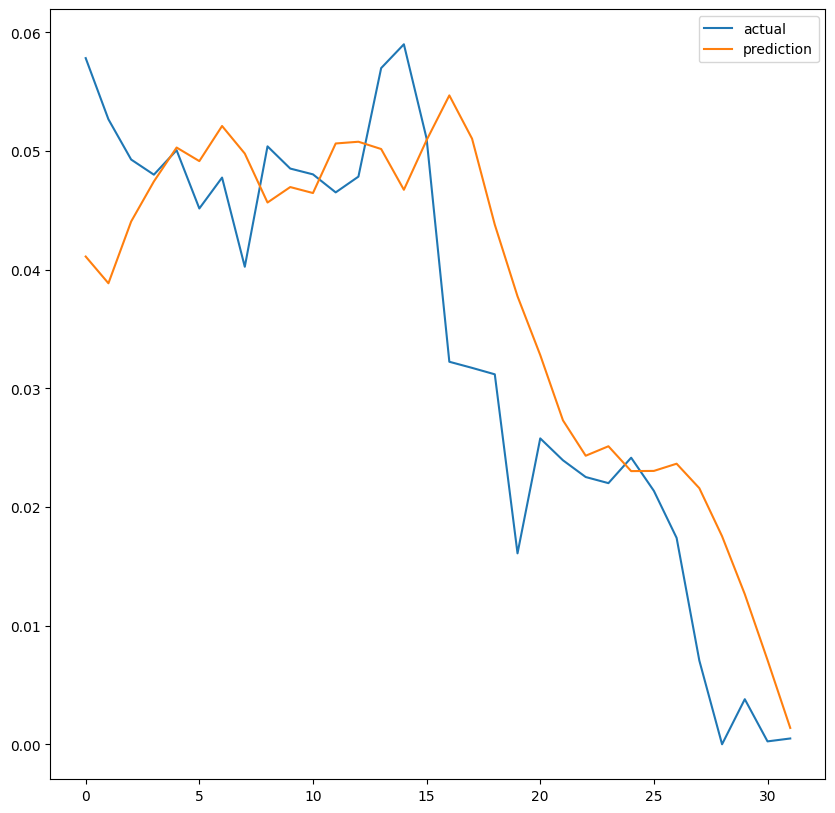

In [62]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [63]:
actual


array([[0.05782276],
       [0.05266728],
       [0.04927552],
       [0.04800022],
       [0.05006241],
       [0.04515114],
       [0.04775601],
       [0.04023987],
       [0.05038802],
       [0.04851576],
       [0.04802735],
       [0.04650784],
       [0.04783741],
       [0.0569816 ],
       [0.05898953],
       [0.05103924],
       [0.03223531],
       [0.03171976],
       [0.03117708],
       [0.01609052],
       [0.02577739],
       [0.02393227],
       [0.0225213 ],
       [0.02200575],
       [0.02414935],
       [0.02135453],
       [0.01739296],
       [0.00705487],
       [0.        ],
       [0.00379877],
       [0.00024421],
       [0.00048841]])

In [77]:
df_pred = pd.DataFrame(pred)

In [79]:
df = df_pred.transpose()

In [80]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.041102,0.038848,0.044055,0.04743,0.050288,0.049144,0.052102,0.049781,0.045654,0.046957,...,0.024316,0.025114,0.02302,0.023037,0.023644,0.021581,0.017532,0.012649,0.007099,0.001378


In [88]:
plus_earn_pred = (df[31]-df[0])*100
plus_earn_pred

0   -3.972449
dtype: float32

In [89]:
minus_earn_pred = (df[0]-df[31])*100
minus_earn_pred

0    3.972449
dtype: float32

In [91]:
df_actual = pd.DataFrame(actual)
df2 = df_actual.transpose()

In [93]:
plus_earn_actual = (df2[31]-df2[0])*100
plus_earn_actual

0   -5.733435
dtype: float64

In [92]:
minus_earn_pred = (df2[0]-df2[31])*100
minus_earn_pred

0    5.733435
dtype: float64